# Test beamforming for the high-Q gliders

In [15]:
# Imports

from os.path import join
from matplotlib.pyplot import subplots
from matplotlib.dates import DateFormatter
from matplotlib.dates import MinuteLocator, SecondLocator
from matplotlib.patches import Rectangle
from matplotlib.ticker import MultipleLocator
from pandas import Timestamp, Timedelta
from numpy import log10, sqrt
from obspy.core.util import AttribDict

from utils_basic import INNER_STATIONS_A, INNER_STATIONS_B, GEO_COMPONENTS, get_geophone_locs,get_timeax_from_trace
from utils_plot import VELOCITY_LABEL, component_to_title, format_utc_xlabels, get_geo_component_color, plot_beam_images
from utils_preproc import read_and_process_windowed_geo_waveforms
from utils_spec import get_spectrogram_stft
from utils_array import get_beam_images, set_station_coords

In [16]:
# Inputs
## Data
starttime = Timestamp("2020-01-13T20:57:45Z")
dur = 90.0 # seconds
stations = ["A01", "A02", "A03"]
components = GEO_COMPONENTS

## Preprocessing
freqmin = 50.0
freqmax = 100.0

## Plotting
xdim = 6.0
ydim = 2.0

ylim_wf = (-50.0, 50.0)

vel_label = VELOCITY_LABEL

dbmin = -50.0
dbmax = 0.0

ylim_freq = (0.0, 200.0)

linewidth_wf = 0.1

In [17]:
# Read the station coordinates
stacoords = get_geophone_locs()

In [18]:
# Read and preprocess the data
stream = read_and_process_windowed_geo_waveforms(starttime, dur, stations=stations, freqmin=freqmin, freqmax=freqmax)

array([[<Axes: title={'center': 'Up'}, ylabel='Velocity (nm s$^{-1}$)'>,
        <Axes: title={'center': 'North'}>,
        <Axes: title={'center': 'East'}>],
       [<Axes: ylabel='Frequency (Hz)'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='Velocity (nm s$^{-1}$)'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='Time (UTC)', ylabel='Frequency (Hz)'>,
        <Axes: xlabel='Time (UTC)'>, <Axes: xlabel='Time (UTC)'>],
       [<Axes: ylabel='Velocity (nm s$^{-1}$)'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='Frequency (Hz)'>, <Axes: >, <Axes: >]],
      dtype=object)

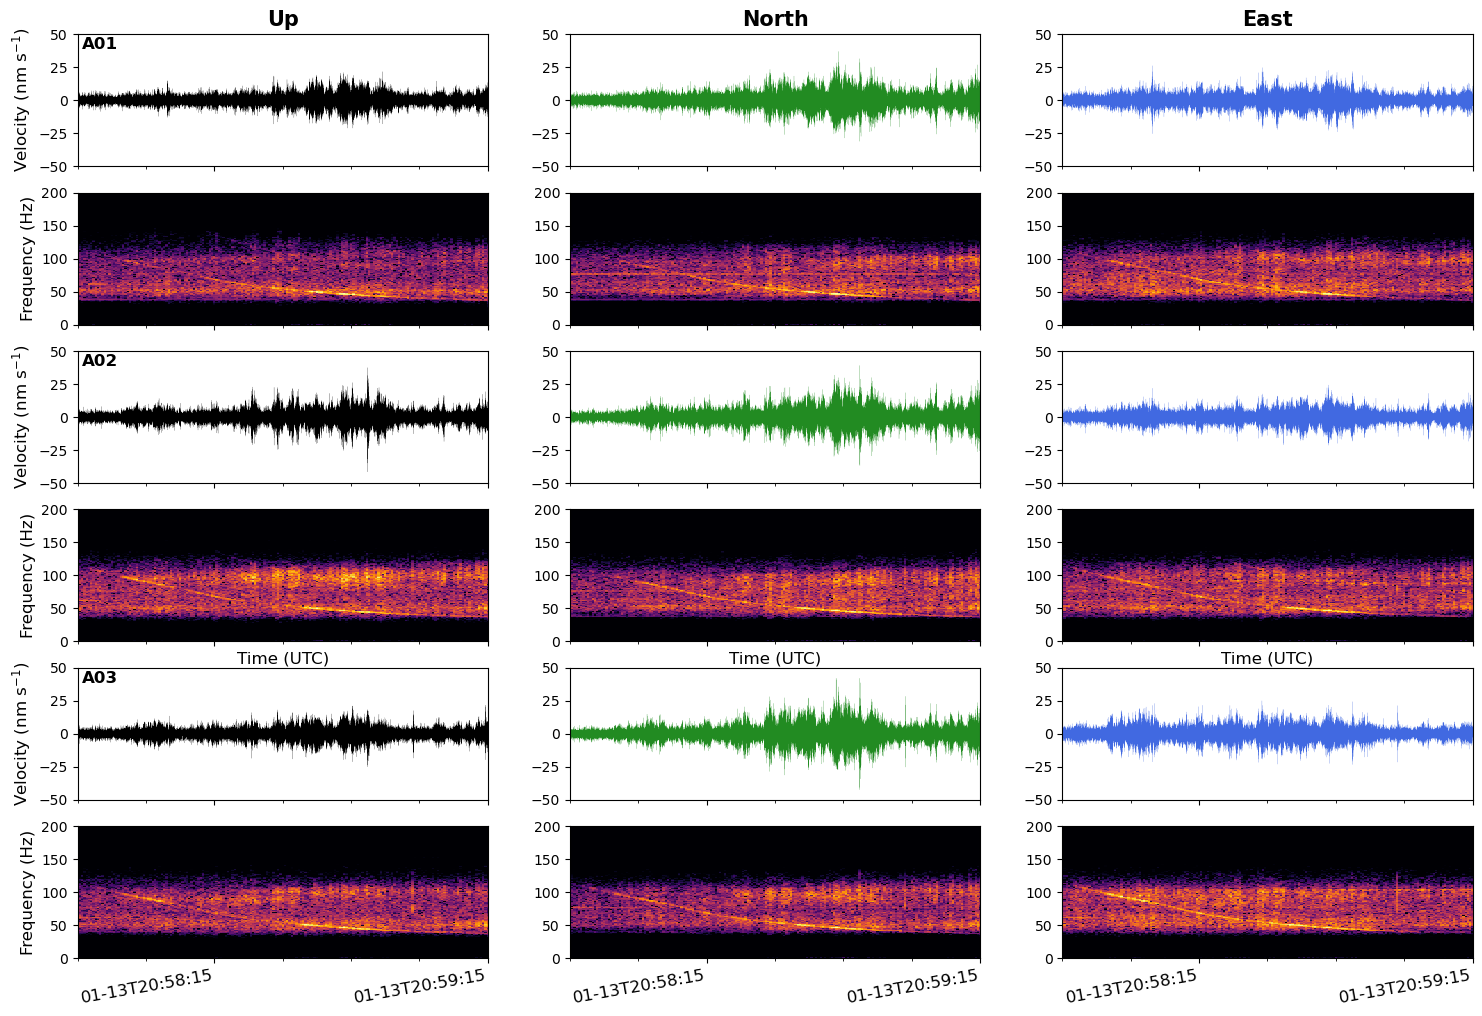

In [19]:
# Plot the waveforms and the spectrograms
numsta = len(stations)
fig, axes = subplots(2 * numsta, 3, figsize=(xdim * 3, ydim * numsta * 2), sharex=True)

for i, component in enumerate(components):
    for j, station in enumerate(stations):
        trace = stream.select(station=station, component=component)[0]

        ## Plot the waveforms
        signal = trace.data
        timeax_wf = get_timeax_from_trace(trace)

        ax = axes[2 * j, i]
        color = get_geo_component_color(component)
        ax.plot(timeax_wf, signal, color=color, linewidth=linewidth_wf)

        ax.set_ylim(ylim_wf)

        if j == 0:
            title = component_to_title(component)
            ax.set_title(f"{title}", fontsize=15, fontweight="bold")

        if i == 0:
            ax.set_ylabel(vel_label, fontsize=12)
            ax.text(0.01, 0.98, f"{station}", fontsize=12, fontweight="bold", transform=ax.transAxes, ha="left", va="top") 


        ## Compute and plot the spectrograms
        timeax_spec, freqax, spec = get_spectrogram_stft(trace)

        ax = axes[2 * j + 1, i]
        ax.pcolormesh(timeax_spec, freqax, spec, cmap="inferno", vmin=dbmin, vmax=dbmax)

        ax.set_ylim(ylim_freq)

        if j == 1:
            ax.set_xlabel("Time (UTC)", fontsize=12)

        if i == 0:
            ax.set_ylabel("Frequency (Hz)", fontsize=12)

ax = axes[0, 0]
ax.set_xlim(timeax_wf[0], timeax_wf[-1])

format_utc_xlabels(axes)


Beamforming 2 component...
Beamforming Z component...
Beamforming 1 component...


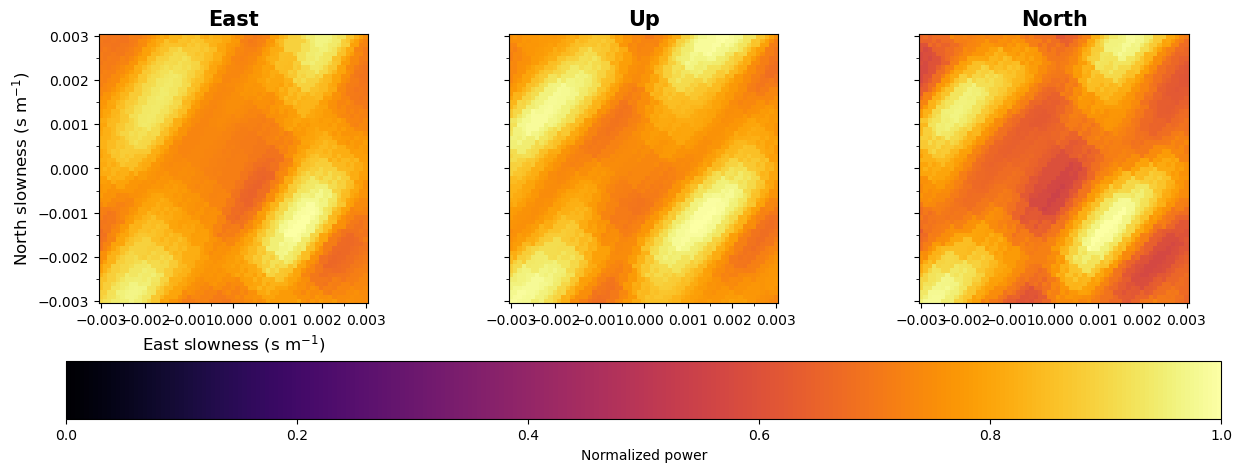

In [20]:
# Perform beamforming and plot
## Set the station coordinates
stream = set_station_coords(stream, stacoords)

## Beamforming
xslow, yslow, beamdict = get_beam_images(stream)

## Plot the beamforming results
fig, axes = plot_beam_images(xslow, yslow, beamdict)

In [21]:
1 / (0.001 ** 2 + 0.0015 ** 2) ** 0.5

554.7001962252291